In [21]:
import cv2
import pytesseract 
import matplotlib.pyplot as plt
import numpy as np

In [105]:
def digitalize_img(img_name,im_kernel=np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])):
    #Loading Image
    img = cv2.imread("DocSample.PNG")
    pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
    #Processing
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Performing OTSU threshold 
    ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV) 

    # Specify structure shape and kernel size.  
    # Kernel size increases or decreases the area  
    # of the rectangle to be detected. 
    # A smaller value like (10, 10) will detect  
    # each word instead of a sentence. 
    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 25)) 

    # Appplying dilation on the threshold image 
    dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1) 

    # Finding contours 
    contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,  
                                                     cv2.CHAIN_APPROX_NONE) 

    # Creating a copy of image 
    im2 = img.copy() 

    # A text file is created and flushed 
    file = open("recognized.txt", "w+") 
    file.write("") 
    file.close() 
    
    #Applying filters to increase contrast
    kernel = im_kernel
    im3 = cv2.filter2D(im2, -1, kernel)
    plt.imshow(im3)
    
    #*********************************************
    #softing 
    kernel = np.ones((4,4),np.float32)/16
    im3 = cv2.filter2D(im3, -1, kernel)
    #*********************************************
    
    # Looping through the identified contours 
    # Then rectangular part is cropped and passed on 
    # to pytesseract for extracting text from it 
    # Extracted text is then written into the text file 
    for cnt in contours: 
        x, y, w, h = cv2.boundingRect(cnt) 

        # Drawing a rectangle on copied image 
        rect = cv2.rectangle(im3, (x, y), (x + w, y + h), (0, 255, 0), 2) 

        # Cropping the text block for giving input to OCR 
        cropped = im3[y:y + h, x:x + w]
        cv2.THRESH_BINARY=0
        cropped_mono = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY) 
        ret,thresh_cr = cv2.threshold(cropped_mono,127,255,cv2.THRESH_BINARY)
        plt.imshow(thresh_cr)
        plt.show()
        #print(cropped)
        # Open the file in append mode 
        file = open("recognized.txt", "a")

        # Apply OCR on the cropped image 
        text = pytesseract.image_to_string(thresh_cr,config ='--psm 6') 
        #text = pytesseract.image_to_string(cropped) 
        #print(text)
        # Appending the text into file 
        file.write(text) 
        file.write("\n") 

        # Close the file 
        file.close 
        pass
    print('Digitalization done')
    pass

In [31]:
def kernel_tester(img_name, full_test=False):
    #Loading Image
    img = cv2.imread("DocSample.PNG")
    pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
    #Processing
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Performing OTSU threshold 
    ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV) 

    # Specify structure shape and kernel size.  
    # Kernel size increases or decreases the area  
    # of the rectangle to be detected. 
    # A smaller value like (10, 10) will detect  
    # each word instead of a sentence. 
    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 25)) 

    # Appplying dilation on the threshold image 
    dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1) 

    # Finding contours 
    contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,  
                                                     cv2.CHAIN_APPROX_NONE) 

    # Creating a copy of image 
    im2 = img.copy() 

    # A text file is created and flushed 
    file = open("recognized.txt", "w+") 
    file.write("") 
    file.close() 
    
    #kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    #kernel = np.array([[-1,-1,-1,-1], [-1,3.25,3.25,-1], [-1,3.25,3.25,-1], [-1,-1,-1,-1]])
    #kernel = np.array([[-1,-1,-1,-1,-1], [-1,1,1,1,-1], [-1,1,9,1,-1], [-1,1,1,1,-1],[-1,-1,-1,-1,-1]])
    kernel = np.array([[-1,-1,-1,-1,-1], [-1,0.5,1,0.5,-1], [-1,1,11,1,-1], [-1,0.5,1,0.5,-1],[-1,-1,-1,-1,-1]])
    im3 = cv2.filter2D(im2, -1, kernel)
    #softing 
    #kernel = np.ones((6,6),np.float32)/36
    #im3 = cv2.filter2D(im3, -1, kernel)
    plt.imshow(im3)
    print('Digitalization done')
    if full_test is True:
        for cnt in contours: 
            x, y, w, h = cv2.boundingRect(cnt) 

            # Drawing a rectangle on copied image 
            rect = cv2.rectangle(im3, (x, y), (x + w, y + h), (0, 255, 0), 2) 

            # Cropping the text block for giving input to OCR 
            cropped = im3[y:y + h, x:x + w]
            #cv2.THRESH_BINARY=115
            cv2.THRESH_BINARY=115
            cropped_mono = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY) 
            ret,thresh_cr = cv2.threshold(cropped_mono,127,255,cv2.THRESH_BINARY)
            plt.imshow(thresh_cr)
            plt.show()
            #print(cropped)
            # Open the file in append mode 
            # Apply OCR on the cropped image 
            #text = pytesseract.image_to_string(thresh_cr,config ='--psm 6') 
            text = pytesseract.image_to_string(thresh_cr,config='--psm 6, outputbase digits')
            #text = pytesseract.image_to_string(cropped) 
            #print(text)
            # Appending the text into file 
            print(text)
        pass
    pass

Digitalization done


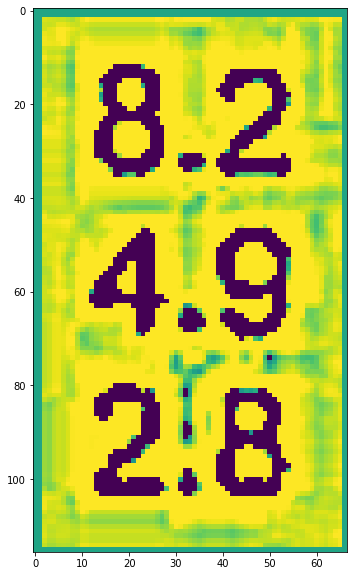

8.2
4.9
28



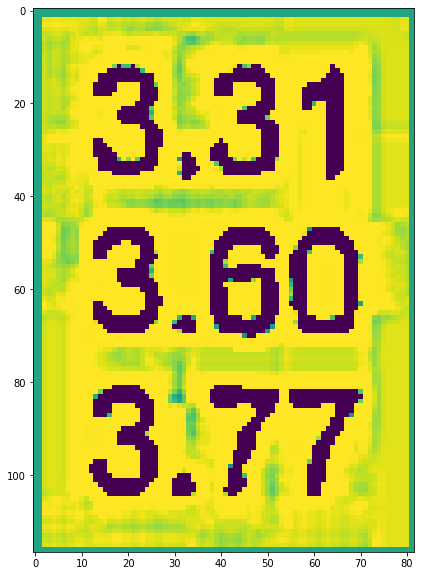

3.31
3.60
3.77



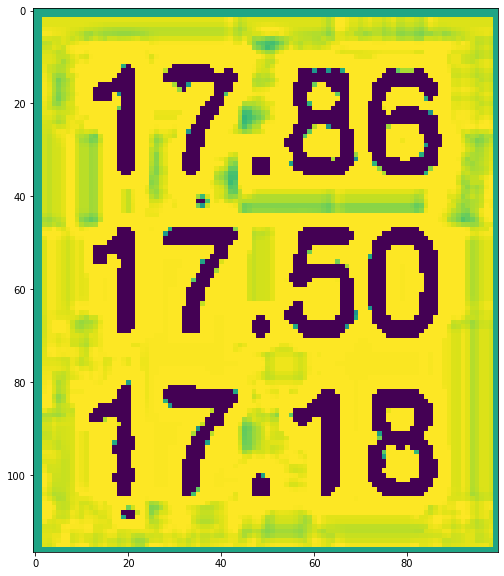

17.86
17.50
17.18



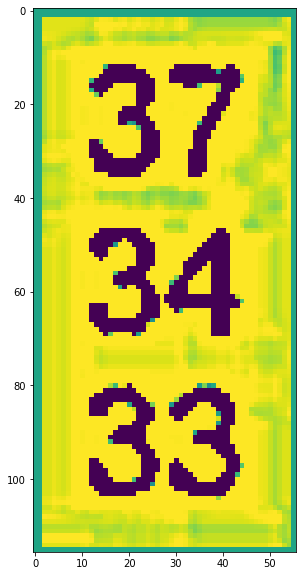

37
34
33



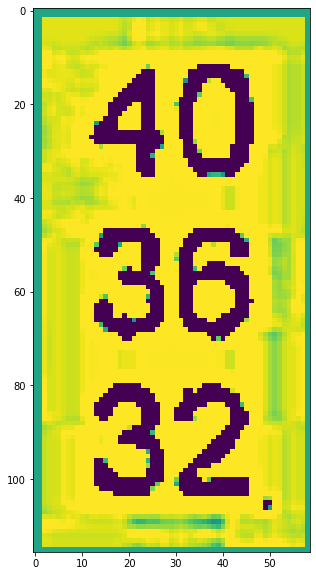

40
36
32.



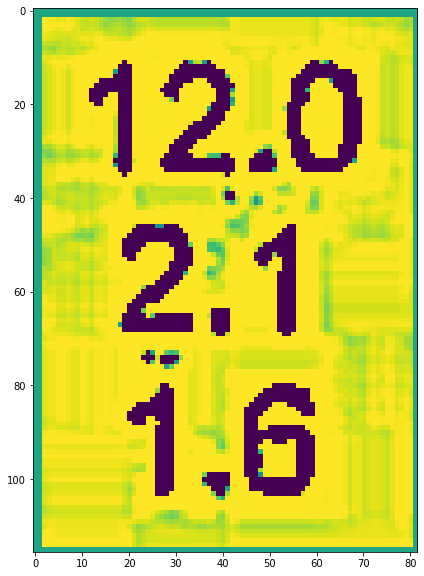

12.0
21
1.6



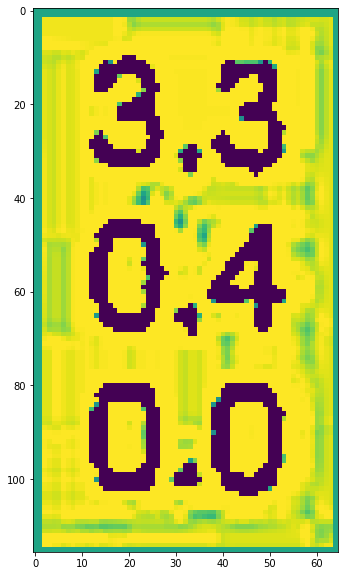

3.3
0.4
0.0



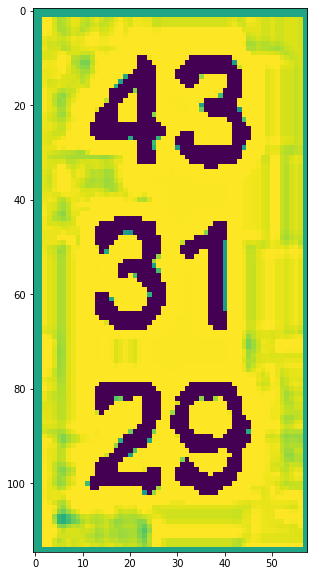

43
31
29



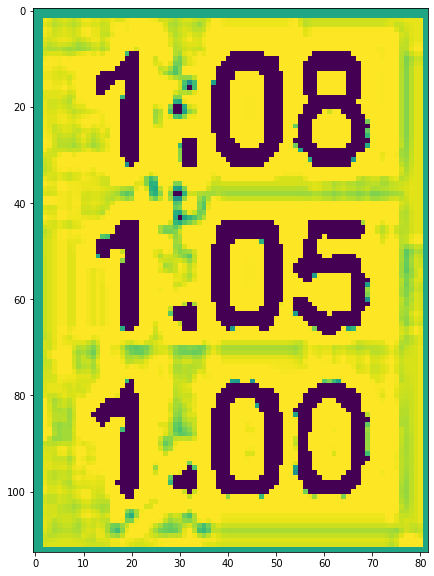

108
1.05
4.00



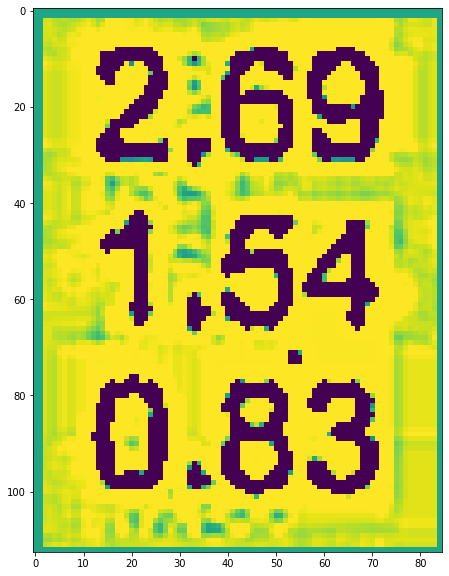

269
1.54
0.83



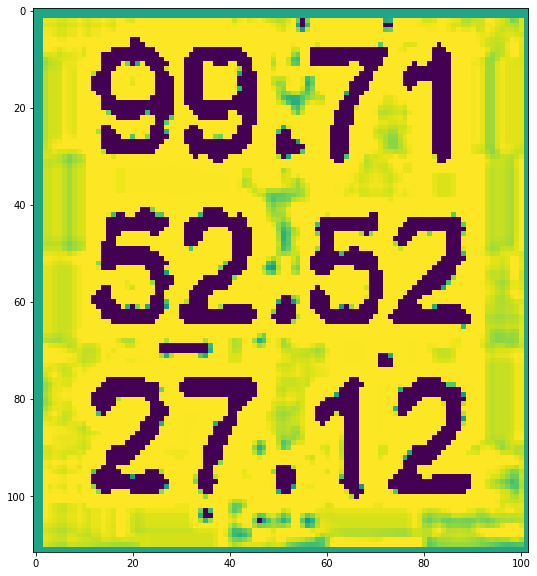

99.71
52.52
27.12



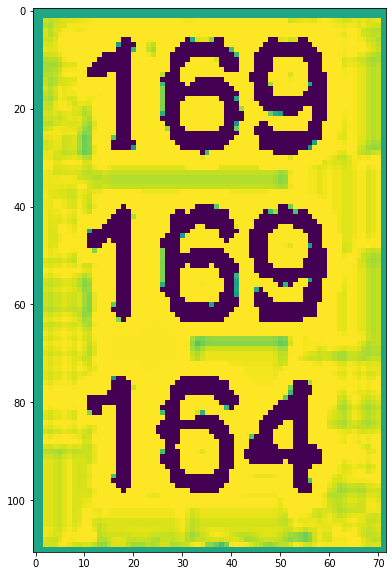

169
169
164



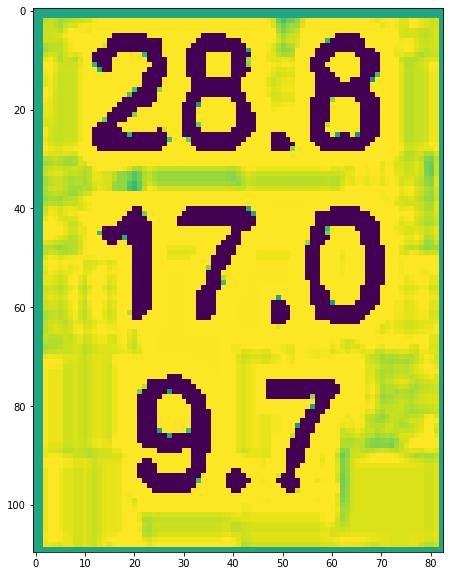

28.8
17.0
9.7



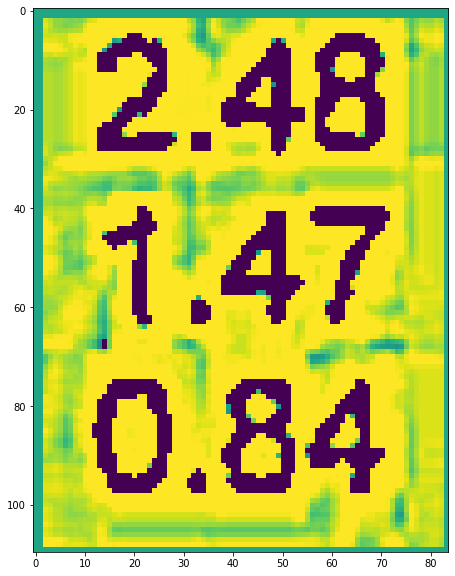

2.48
1.47
0.84



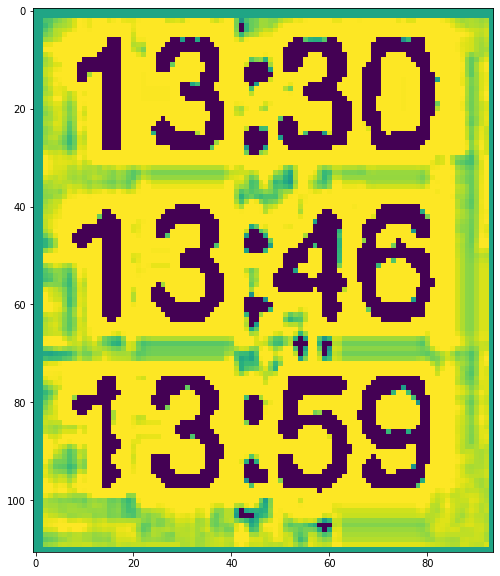

1330
13346
1359



In [46]:
kernel_tester("DocSample.PNG", True)